In [1]:
import pandas as pd
import numpy as np

# 데이터 파일 경로
train1_path = "C:/Users/Pro/Desktop/AnomalyDiT-main/AnomalyDiT-main/Dataset/NonInvasiveFetalECGThorax1_TRAIN.tsv"
test1_path = "C:/Users/Pro/Desktop/AnomalyDiT-main/AnomalyDiT-main/Dataset/NonInvasiveFetalECGThorax1_TEST.tsv"
train2_path = "C:/Users/Pro/Desktop/AnomalyDiT-main/AnomalyDiT-main/Dataset/NonInvasiveFetalECGThorax2_TRAIN.tsv"
test2_path = "C:/Users/Pro/Desktop/AnomalyDiT-main/AnomalyDiT-main/Dataset/NonInvasiveFetalECGThorax2_TEST.tsv"

# 데이터 로딩
train1 = pd.read_csv(train1_path, sep="\t", header=None)
test1 = pd.read_csv(test1_path, sep="\t", header=None)
train2 = pd.read_csv(train2_path, sep="\t", header=None)
test2 = pd.read_csv(test2_path, sep="\t", header=None)

In [2]:
print(sorted(train1[0].unique()))
print("train1 클래스 수:", len(train1[0].unique()))

print(sorted(test1[0].unique()))
print("test1 클래스 수:", len(test1[0].unique()))

print(sorted(train2[0].unique()))
print("train2 클래스 수:", len(train2[0].unique()))

print(sorted(test2[0].unique()))
print("test2 클래스 수:", len(test2[0].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
train1 클래스 수: 42
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
test1 클래스 수: 42
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
train2 클래스 수: 42
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
test2 클래스 수: 42


In [3]:
# 학습용/테스트용 데이터 각각 결합
train_combined = pd.concat([train1, train2], ignore_index=True)
test_combined = pd.concat([test1, test2], ignore_index=True)

In [4]:
print(sorted(train_combined[0].unique()))
print("train_combined 클래스 수:", len(train_combined[0].unique()))

print(sorted(test_combined[0].unique()))
print("test_combined 클래스 수:", len(test_combined[0].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
train_combined 클래스 수: 42
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
test_combined 클래스 수: 42


In [5]:
def inject_transient_mean_shift_with_labels(df, min_start=400, max_start=650, window=50, delta=2.0):
    """
    각 시계열에 대해 일시적(mean shift) 이상을 무작위로 삽입하고
    시점별 이상 라벨을 생성함.

    반환값:
    - 변경된 시계열 데이터 DataFrame
    - 시점별 이상 라벨 (0=정상, 1=이상), shape=(N, T)
    - 이상 시작 시점 리스트
    """
    labels = df.iloc[:, 0].copy()
    series = df.iloc[:, 1:].copy().values
    num_samples, T = series.shape

    # 시점별 이상 라벨 (0 or 1)
    anomaly_labels = np.zeros_like(series)
    anomaly_starts = []

    for i in range(num_samples):
        # 랜덤한 이상 시작 시점 선택
        shift_start = np.random.randint(min_start, max_start)
        shift_end = min(shift_start + window, T)
        series[i, shift_start:shift_end] += delta
        anomaly_labels[i, shift_start:shift_end] = 1
        anomaly_starts.append(shift_start)

    df_anom = pd.DataFrame(np.column_stack([labels, series]))
    return df_anom, anomaly_labels, anomaly_starts

In [6]:
# 이상치 포함 데이터 생성
test_anomalous, point_labels, anomaly_starts = inject_transient_mean_shift_with_labels(test_combined)

In [7]:
print(sorted(test_anomalous[0].unique()))
print("test_anomalous 클래스 수:", len(test_anomalous[0].unique()))

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0]
test_anomalous 클래스 수: 42


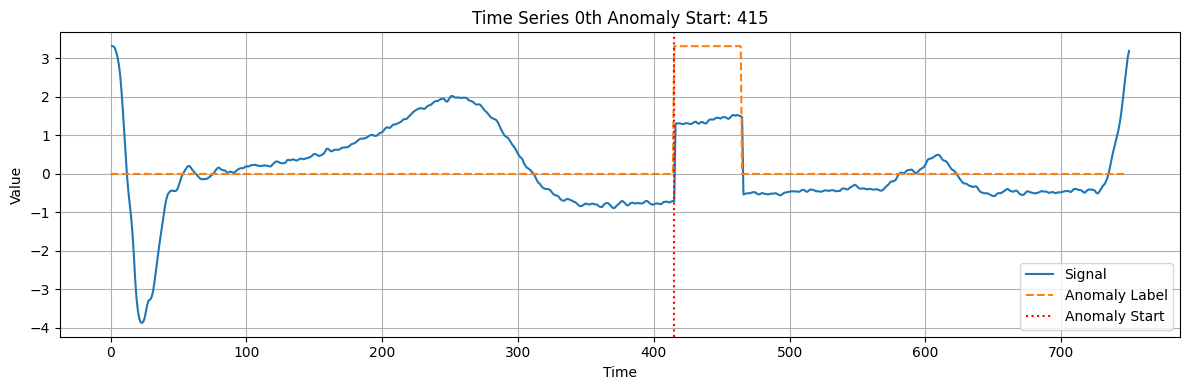

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
i = 0  # 예시 시계열 인덱스
plt.plot(test_anomalous.iloc[i, 1:], label="Signal")
plt.plot(point_labels[i] * np.max(test_anomalous.iloc[i, 1:]), label="Anomaly Label", linestyle='--')
plt.axvline(anomaly_starts[i], color='red', linestyle=':', label='Anomaly Start')
plt.title(f"Time Series {i}th Anomaly Start: {anomaly_starts[i]}")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

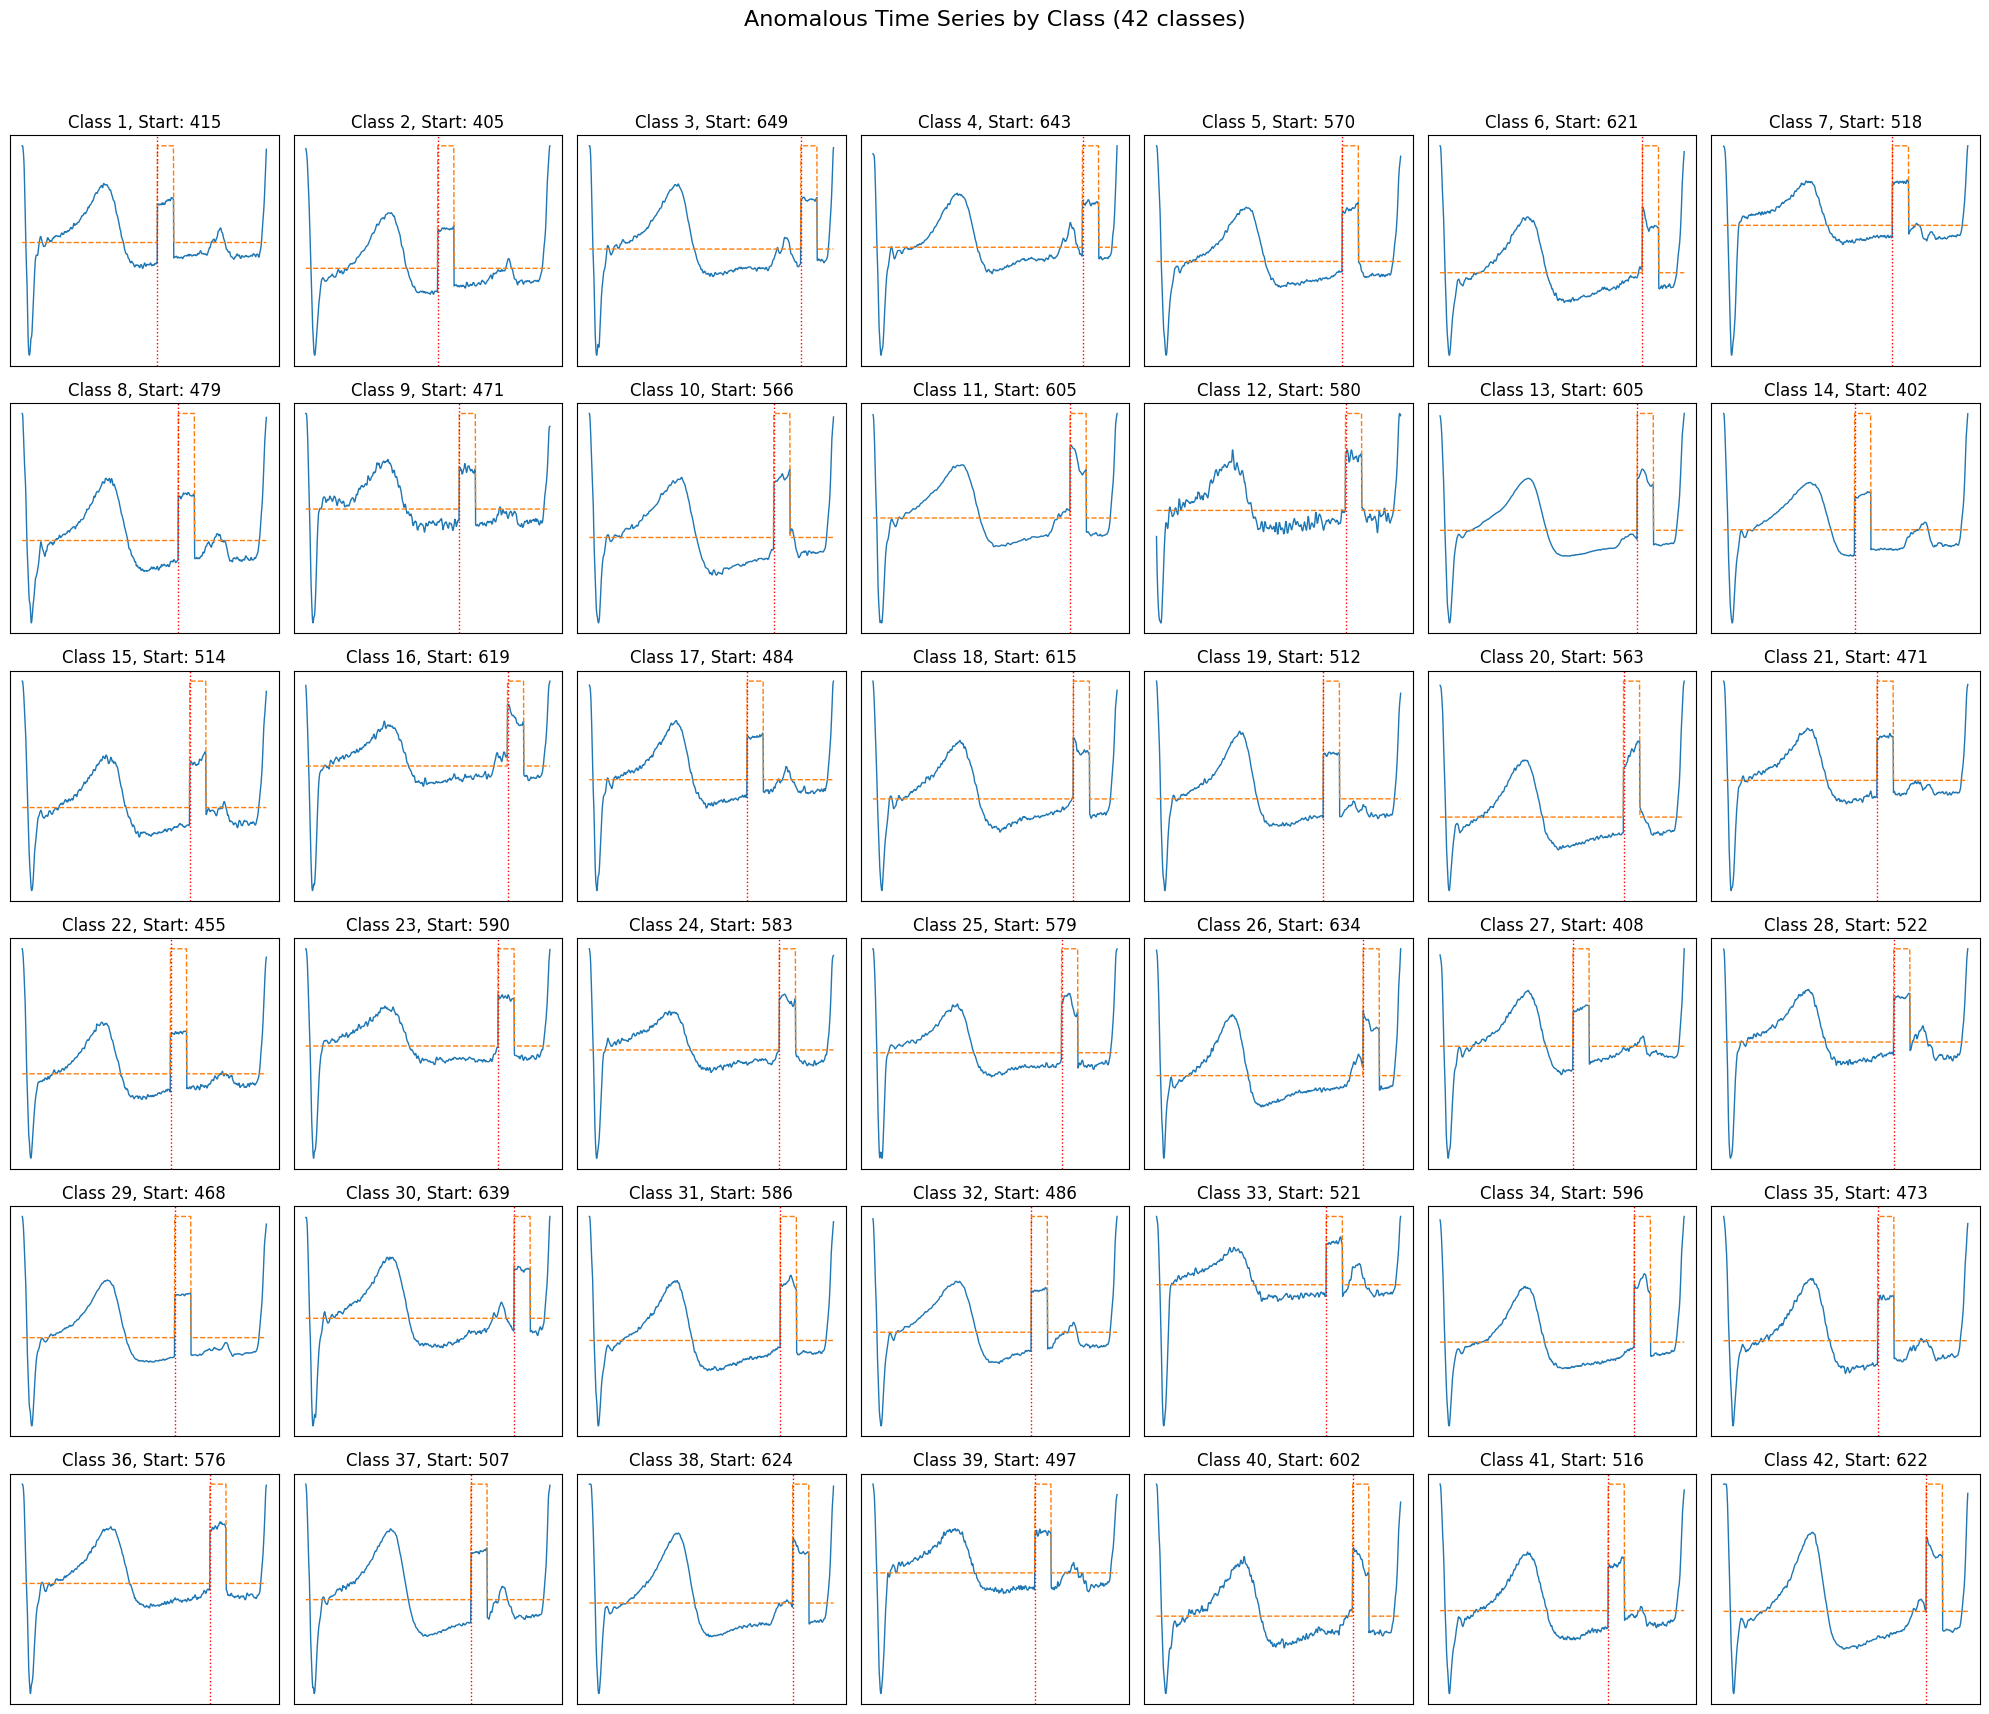

In [ ]:
# 고유 클래스 목록
unique_classes = sorted(test_anomalous.iloc[:, 0].unique())

plt.figure(figsize=(20, 18))
for idx, cls in enumerate(unique_classes):
    # 해당 클래스에 속한 첫 번째 시계열 인덱스 찾기
    i = test_anomalous[test_anomalous.iloc[:, 0] == cls].index[0]

    plt.subplot(6, 7, idx + 1)
    signal = test_anomalous.iloc[i, 1:].values.astype(float)
    anomaly = point_labels[i]
    anomaly_start = anomaly_starts[i]

    plt.plot(signal, label="Signal", linewidth=1)
    plt.plot(anomaly * np.max(signal), label="Anomaly Label", linestyle='--', linewidth=1)
    plt.axvline(anomaly_start, color='red', linestyle=':', linewidth=1)

    plt.title(f"Class {int(cls)}, Start: {anomaly_start}")
    plt.xticks([])
    plt.yticks([])

plt.suptitle("Anomalous Time Series by Class (42 classes)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [15]:
train_save_path = "C:/Users/Pro/Desktop/AnomalyDiT-main/AnomalyDiT-main/Dataset/ECG_Train_with_normal.csv"
test_save_path = "C:/Users/Pro/Desktop/AnomalyDiT-main/AnomalyDiT-main/Dataset/ECG_Test_with_anomaly.csv"
label_save_path = "C:/Users/Pro/Desktop/AnomalyDiT-main/AnomalyDiT-main/Dataset/ECG_Anomaly_PointLabels.npy"

train_combined.to_csv(train_save_path, index=False, header=False)
test_anomalous.to_csv(test_save_path, index=False, header=False)
np.save(label_save_path, point_labels)

In [16]:
# CSV 불러오기
train_df = pd.read_csv(train_save_path, header=None)
test_df = pd.read_csv(test_save_path, header=None)
point_labels = np.load(label_save_path)

In [17]:
# 고유 클래스 확인
unique_classes = sorted(test_df.iloc[:, 0].unique())
len(unique_classes)

42

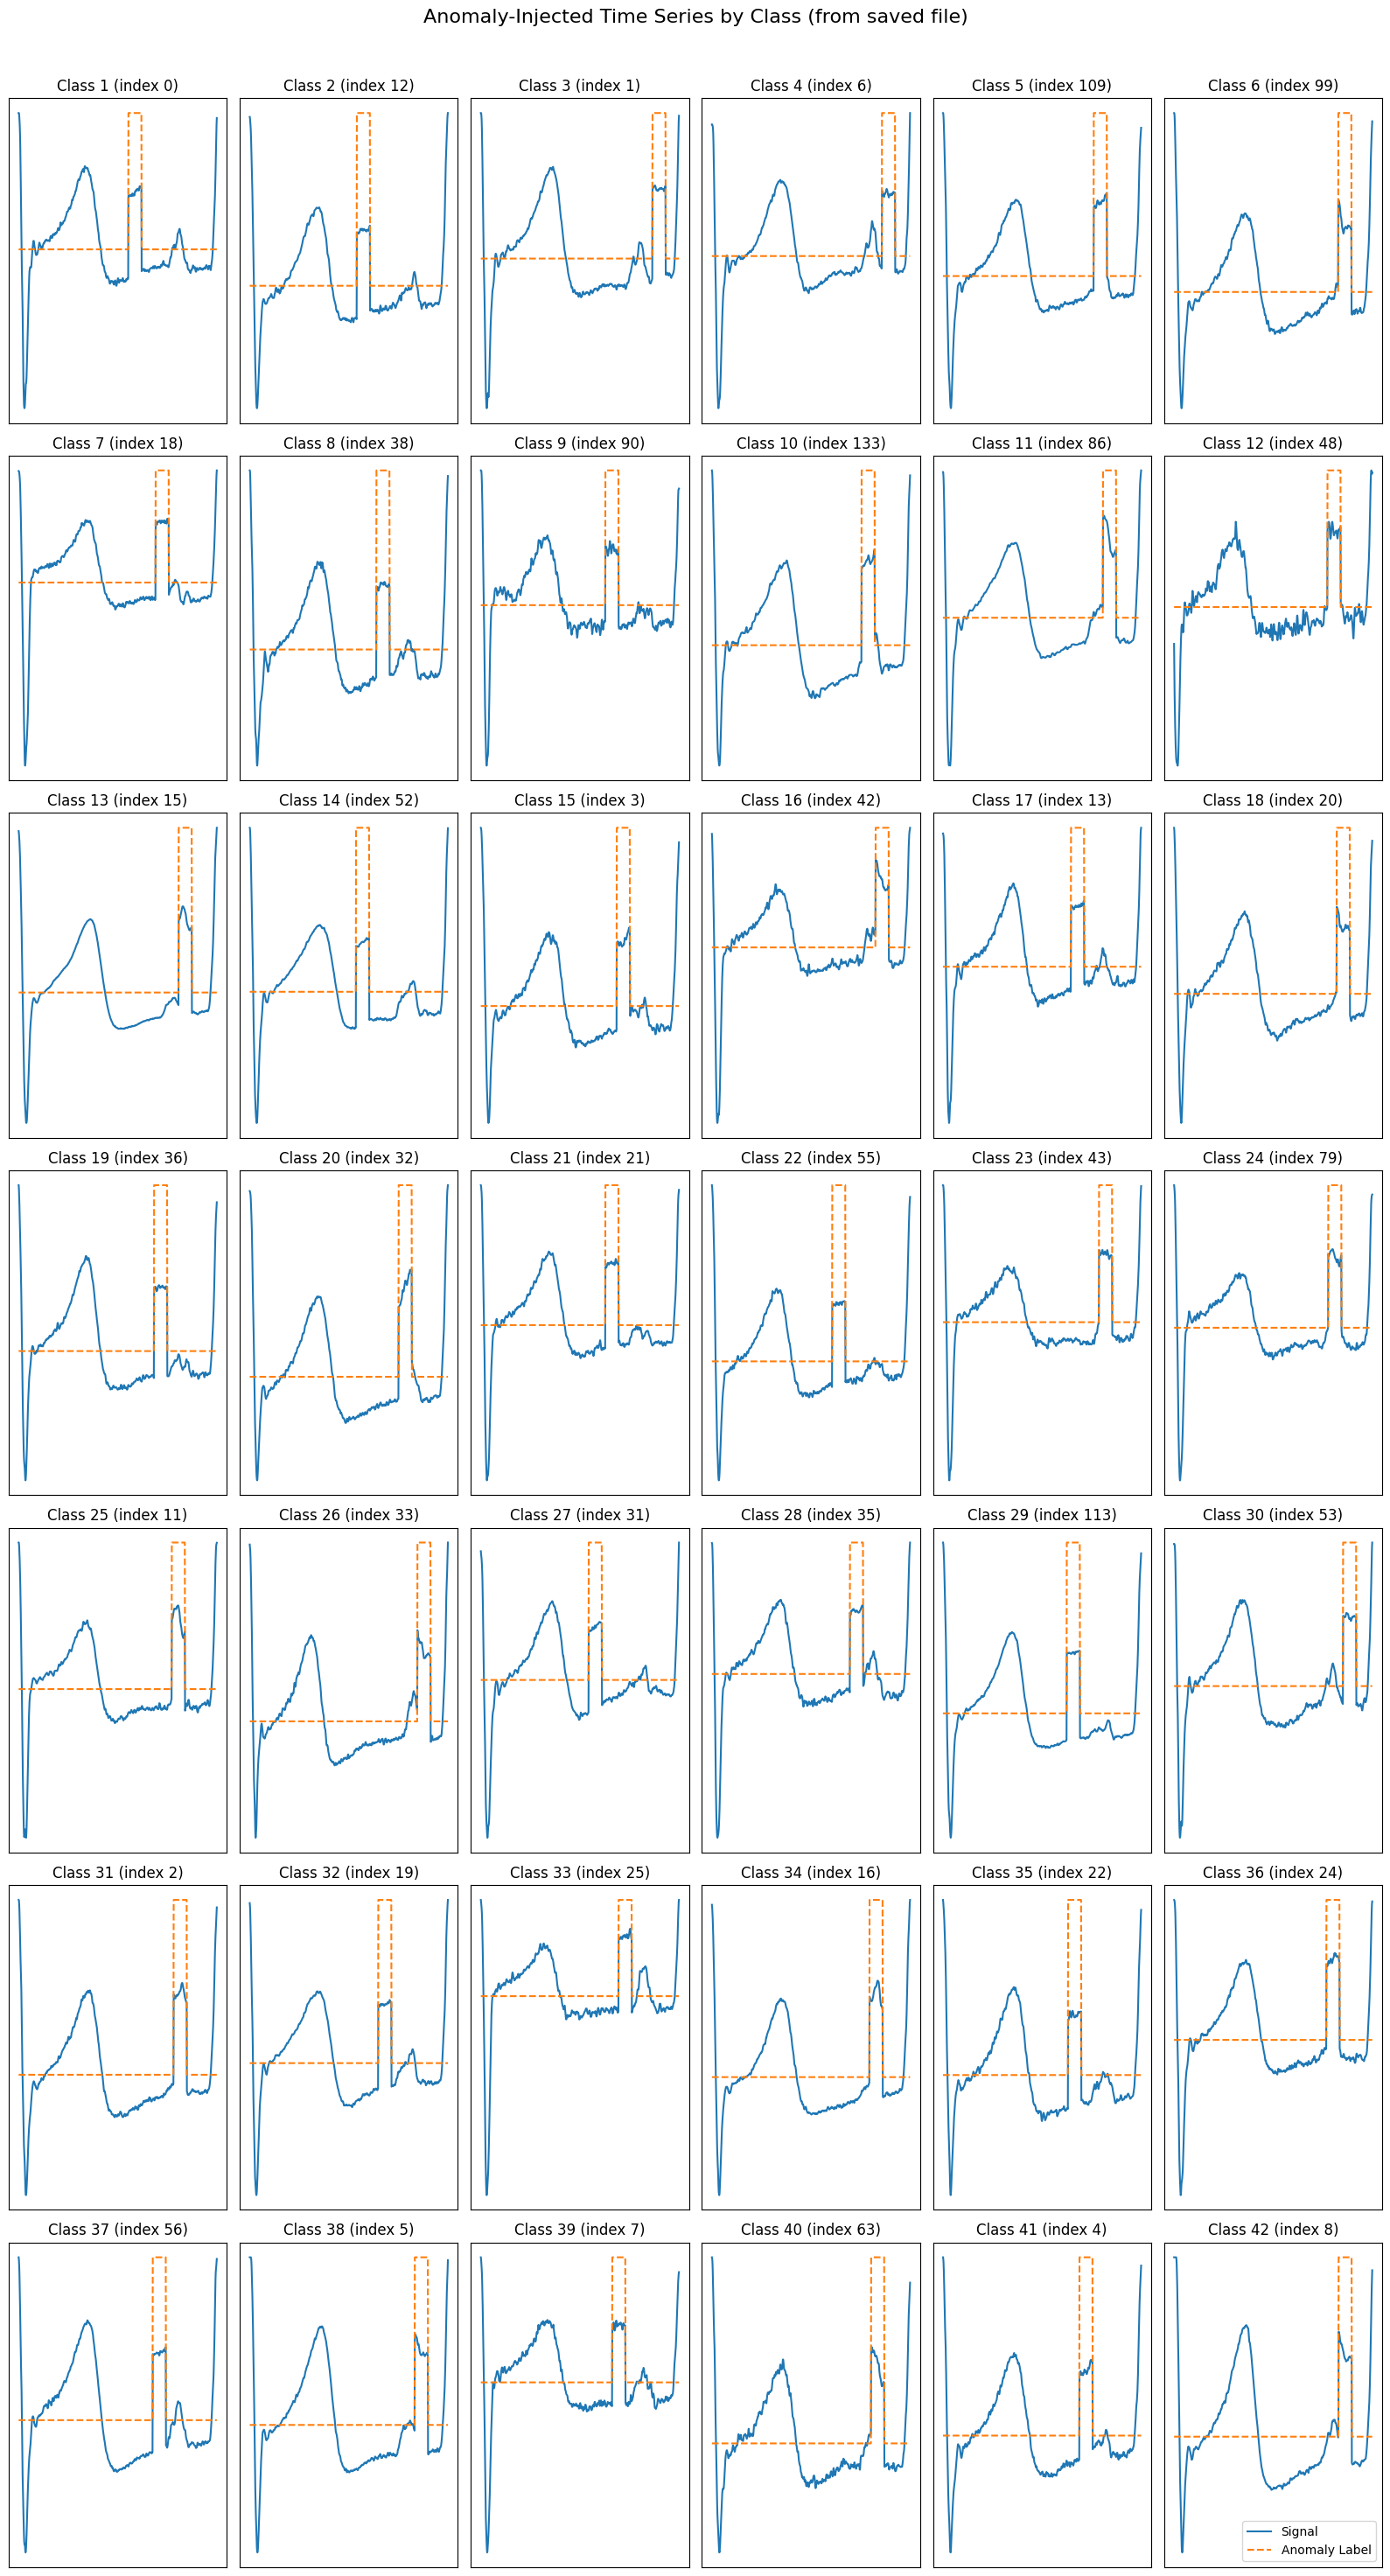

In [18]:
plt.figure(figsize=(16, 30))
for idx, cls in enumerate(unique_classes):
    series_idx = test_df[test_df.iloc[:, 0] == cls].index[0]
    signal = test_df.iloc[series_idx, 1:].values.astype(float)
    anomaly = point_labels[series_idx] * np.max(signal)

    plt.subplot(7, 6, idx + 1)
    plt.plot(signal, label='Signal')
    plt.plot(anomaly, label='Anomaly Label', linestyle='--')
    plt.title(f'Class {int(cls)} (index {series_idx})')
    plt.grid(True)
    plt.xticks([])
    plt.yticks([])

plt.suptitle("Anomaly-Injected Time Series by Class (from saved file)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.legend(loc='lower right')
plt.show()